## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  43.474439  1393.925573  0.818413  4.470384  1.346389
1  88.654123   825.787259  0.739312  9.283310  1.473783
2  43.985853  1704.399110  0.218568  7.812508  1.388043
3  28.428089   523.334254  0.191969  8.565176  1.254500
4  80.923828   296.265517  0.495108  3.631842  1.025406


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.02622 | train_mse: 9.70665 | train_mae: 2.49487 |  0:00:00s
epoch 1  | loss: 0.56586 | train_mse: 13.59733| train_mae: 2.58351 |  0:00:00s


epoch 2  | loss: 0.51089 | train_mse: 8.60333 | train_mae: 2.2101  |  0:00:00s
epoch 3  | loss: 0.38596 | train_mse: 3.17596 | train_mae: 1.4416  |  0:00:00s
epoch 4  | loss: 0.31327 | train_mse: 1.68976 | train_mae: 1.06549 |  0:00:00s


epoch 5  | loss: 0.40457 | train_mse: 1.32427 | train_mae: 0.92955 |  0:00:00s
epoch 6  | loss: 0.39894 | train_mse: 2.09232 | train_mae: 1.11114 |  0:00:00s
epoch 7  | loss: 0.3131  | train_mse: 1.45808 | train_mae: 0.90241 |  0:00:00s


epoch 8  | loss: 0.25153 | train_mse: 1.25734 | train_mae: 0.78337 |  0:00:01s
epoch 9  | loss: 0.31443 | train_mse: 1.32445 | train_mae: 0.77237 |  0:00:01s


epoch 10 | loss: 0.27956 | train_mse: 1.23426 | train_mae: 0.74194 |  0:00:01s
epoch 11 | loss: 0.20592 | train_mse: 0.76285 | train_mae: 0.60384 |  0:00:01s
epoch 12 | loss: 0.19326 | train_mse: 0.47436 | train_mae: 0.49866 |  0:00:01s


epoch 13 | loss: 0.25591 | train_mse: 0.27009 | train_mae: 0.36727 |  0:00:01s
epoch 14 | loss: 0.19828 | train_mse: 0.34081 | train_mae: 0.40363 |  0:00:01s
epoch 15 | loss: 0.17396 | train_mse: 0.43576 | train_mae: 0.46439 |  0:00:01s


epoch 16 | loss: 0.25441 | train_mse: 0.88193 | train_mae: 0.63953 |  0:00:01s
epoch 17 | loss: 0.18526 | train_mse: 0.78475 | train_mae: 0.6021  |  0:00:01s
epoch 18 | loss: 0.2303  | train_mse: 0.7456  | train_mae: 0.57734 |  0:00:02s


epoch 19 | loss: 0.1685  | train_mse: 0.43308 | train_mae: 0.45401 |  0:00:02s
epoch 20 | loss: 0.16606 | train_mse: 0.269   | train_mae: 0.37785 |  0:00:02s
epoch 21 | loss: 0.1903  | train_mse: 0.18736 | train_mae: 0.32681 |  0:00:02s


epoch 22 | loss: 0.21897 | train_mse: 0.13623 | train_mae: 0.28699 |  0:00:02s
epoch 23 | loss: 0.14066 | train_mse: 0.14187 | train_mae: 0.28238 |  0:00:02s
epoch 24 | loss: 0.15445 | train_mse: 0.14415 | train_mae: 0.28444 |  0:00:02s


epoch 25 | loss: 0.43002 | train_mse: 0.13616 | train_mae: 0.28815 |  0:00:02s
epoch 26 | loss: 0.42363 | train_mse: 0.19089 | train_mae: 0.3349  |  0:00:02s
epoch 27 | loss: 0.20731 | train_mse: 0.18378 | train_mae: 0.3173  |  0:00:02s


epoch 28 | loss: 0.16603 | train_mse: 0.15671 | train_mae: 0.29621 |  0:00:02s
epoch 29 | loss: 0.12299 | train_mse: 0.19806 | train_mae: 0.33991 |  0:00:02s
epoch 30 | loss: 0.1821  | train_mse: 0.14517 | train_mae: 0.29174 |  0:00:02s


epoch 31 | loss: 0.18352 | train_mse: 0.14314 | train_mae: 0.28931 |  0:00:03s
epoch 32 | loss: 0.18266 | train_mse: 0.20206 | train_mae: 0.33279 |  0:00:03s
epoch 33 | loss: 0.15257 | train_mse: 0.17435 | train_mae: 0.31079 |  0:00:03s


epoch 34 | loss: 0.1253  | train_mse: 0.20194 | train_mae: 0.31726 |  0:00:03s
epoch 35 | loss: 0.16424 | train_mse: 0.20952 | train_mae: 0.33024 |  0:00:03s
epoch 36 | loss: 0.3456  | train_mse: 0.23235 | train_mae: 0.34697 |  0:00:03s


epoch 37 | loss: 0.2318  | train_mse: 0.25471 | train_mae: 0.36095 |  0:00:03s
epoch 38 | loss: 0.15291 | train_mse: 0.21979 | train_mae: 0.33845 |  0:00:03s
epoch 39 | loss: 0.15746 | train_mse: 0.15331 | train_mae: 0.28769 |  0:00:03s


epoch 40 | loss: 0.22263 | train_mse: 0.13999 | train_mae: 0.28445 |  0:00:03s
epoch 41 | loss: 0.22418 | train_mse: 0.12572 | train_mae: 0.27382 |  0:00:03s
epoch 42 | loss: 0.24115 | train_mse: 0.20154 | train_mae: 0.32288 |  0:00:03s


epoch 43 | loss: 0.16868 | train_mse: 0.25533 | train_mae: 0.3438  |  0:00:03s
epoch 44 | loss: 0.19046 | train_mse: 0.23349 | train_mae: 0.33071 |  0:00:03s
epoch 45 | loss: 0.17667 | train_mse: 0.22891 | train_mae: 0.33101 |  0:00:04s


epoch 46 | loss: 0.20447 | train_mse: 0.18661 | train_mae: 0.31371 |  0:00:04s
epoch 47 | loss: 0.1413  | train_mse: 0.14601 | train_mae: 0.28225 |  0:00:04s


epoch 48 | loss: 0.12071 | train_mse: 0.10929 | train_mae: 0.25126 |  0:00:04s
epoch 49 | loss: 0.14624 | train_mse: 0.07972 | train_mae: 0.22317 |  0:00:04s
epoch 50 | loss: 0.11603 | train_mse: 0.10319 | train_mae: 0.24908 |  0:00:04s


epoch 51 | loss: 0.20274 | train_mse: 0.12796 | train_mae: 0.27366 |  0:00:04s
epoch 52 | loss: 0.16354 | train_mse: 0.14075 | train_mae: 0.28784 |  0:00:04s
epoch 53 | loss: 0.1471  | train_mse: 0.1307  | train_mae: 0.26889 |  0:00:04s
epoch 54 | loss: 0.14739 | train_mse: 0.12896 | train_mae: 0.26471 |  0:00:04s


epoch 55 | loss: 0.22292 | train_mse: 0.11242 | train_mae: 0.25668 |  0:00:04s
epoch 56 | loss: 0.12929 | train_mse: 0.15044 | train_mae: 0.28886 |  0:00:04s
epoch 57 | loss: 0.11879 | train_mse: 0.18443 | train_mae: 0.32232 |  0:00:05s


epoch 58 | loss: 0.12817 | train_mse: 0.11463 | train_mae: 0.2644  |  0:00:05s
epoch 59 | loss: 0.12281 | train_mse: 0.08726 | train_mae: 0.22922 |  0:00:05s
epoch 60 | loss: 0.16211 | train_mse: 0.08856 | train_mae: 0.22918 |  0:00:05s


epoch 61 | loss: 0.11651 | train_mse: 0.08454 | train_mae: 0.22847 |  0:00:05s
epoch 62 | loss: 0.17614 | train_mse: 0.0833  | train_mae: 0.23028 |  0:00:05s
epoch 63 | loss: 0.13821 | train_mse: 0.08262 | train_mae: 0.22638 |  0:00:05s


epoch 64 | loss: 0.22298 | train_mse: 0.08281 | train_mae: 0.22717 |  0:00:05s
epoch 65 | loss: 0.27781 | train_mse: 0.08821 | train_mae: 0.24115 |  0:00:05s


epoch 66 | loss: 0.11513 | train_mse: 0.08974 | train_mae: 0.24239 |  0:00:05s
epoch 67 | loss: 0.1121  | train_mse: 0.0826  | train_mae: 0.23247 |  0:00:06s


epoch 68 | loss: 0.16842 | train_mse: 0.08846 | train_mae: 0.23086 |  0:00:06s
epoch 69 | loss: 0.11774 | train_mse: 0.08884 | train_mae: 0.23054 |  0:00:06s
epoch 70 | loss: 0.1203  | train_mse: 0.088   | train_mae: 0.23028 |  0:00:06s


epoch 71 | loss: 0.17647 | train_mse: 0.07844 | train_mae: 0.23168 |  0:00:06s
epoch 72 | loss: 0.18206 | train_mse: 0.10485 | train_mae: 0.26772 |  0:00:06s


epoch 73 | loss: 0.10983 | train_mse: 0.08942 | train_mae: 0.24129 |  0:00:06s
epoch 74 | loss: 0.12881 | train_mse: 0.08069 | train_mae: 0.22548 |  0:00:06s


epoch 75 | loss: 0.14592 | train_mse: 0.07336 | train_mae: 0.21968 |  0:00:06s


epoch 76 | loss: 0.14231 | train_mse: 0.08583 | train_mae: 0.2359  |  0:00:07s


epoch 77 | loss: 0.11199 | train_mse: 0.10095 | train_mae: 0.25845 |  0:00:07s
epoch 78 | loss: 0.14836 | train_mse: 0.12989 | train_mae: 0.29462 |  0:00:07s
epoch 79 | loss: 0.13936 | train_mse: 0.10423 | train_mae: 0.2631  |  0:00:07s


epoch 80 | loss: 0.13219 | train_mse: 0.07557 | train_mae: 0.21821 |  0:00:07s
epoch 81 | loss: 0.11375 | train_mse: 0.0739  | train_mae: 0.21869 |  0:00:07s
epoch 82 | loss: 0.07879 | train_mse: 0.08229 | train_mae: 0.22733 |  0:00:07s


epoch 83 | loss: 0.13567 | train_mse: 0.07985 | train_mae: 0.22423 |  0:00:07s
epoch 84 | loss: 0.08847 | train_mse: 0.06664 | train_mae: 0.2054  |  0:00:07s
epoch 85 | loss: 0.27835 | train_mse: 0.07052 | train_mae: 0.21402 |  0:00:08s


epoch 86 | loss: 0.11949 | train_mse: 0.08512 | train_mae: 0.2343  |  0:00:08s
epoch 87 | loss: 0.10476 | train_mse: 0.10015 | train_mae: 0.25686 |  0:00:08s
epoch 88 | loss: 0.08358 | train_mse: 0.08788 | train_mae: 0.24459 |  0:00:08s


epoch 89 | loss: 0.1551  | train_mse: 0.09951 | train_mae: 0.26046 |  0:00:08s
epoch 90 | loss: 0.15259 | train_mse: 0.09843 | train_mae: 0.25888 |  0:00:08s
epoch 91 | loss: 0.14144 | train_mse: 0.08405 | train_mae: 0.23784 |  0:00:08s
epoch 92 | loss: 0.09794 | train_mse: 0.07729 | train_mae: 0.2332  |  0:00:08s


epoch 93 | loss: 0.07929 | train_mse: 0.0869  | train_mae: 0.24629 |  0:00:08s
epoch 94 | loss: 0.12479 | train_mse: 0.12199 | train_mae: 0.28921 |  0:00:08s
epoch 95 | loss: 0.11021 | train_mse: 0.13324 | train_mae: 0.30103 |  0:00:08s
epoch 96 | loss: 0.15686 | train_mse: 0.16231 | train_mae: 0.32393 |  0:00:08s


epoch 97 | loss: 0.11113 | train_mse: 0.16238 | train_mae: 0.31405 |  0:00:08s
epoch 98 | loss: 0.13888 | train_mse: 0.13369 | train_mae: 0.29364 |  0:00:08s
epoch 99 | loss: 0.12961 | train_mse: 0.10703 | train_mae: 0.26929 |  0:00:09s


epoch 100| loss: 0.1211  | train_mse: 0.20104 | train_mae: 0.31668 |  0:00:09s
epoch 101| loss: 0.16102 | train_mse: 0.11723 | train_mae: 0.27524 |  0:00:09s
epoch 102| loss: 0.23647 | train_mse: 0.13285 | train_mae: 0.28827 |  0:00:09s


epoch 103| loss: 0.22738 | train_mse: 0.14822 | train_mae: 0.2893  |  0:00:09s
epoch 104| loss: 0.11692 | train_mse: 0.10891 | train_mae: 0.2488  |  0:00:09s
epoch 105| loss: 0.18792 | train_mse: 0.08572 | train_mae: 0.23039 |  0:00:09s
epoch 106| loss: 0.09949 | train_mse: 0.08879 | train_mae: 0.23082 |  0:00:09s


epoch 107| loss: 0.11414 | train_mse: 0.1002  | train_mae: 0.24397 |  0:00:09s
epoch 108| loss: 0.13802 | train_mse: 0.09039 | train_mae: 0.23389 |  0:00:09s
epoch 109| loss: 0.12494 | train_mse: 0.07008 | train_mae: 0.21336 |  0:00:09s
epoch 110| loss: 0.10078 | train_mse: 0.07353 | train_mae: 0.22129 |  0:00:09s


epoch 111| loss: 0.0955  | train_mse: 0.08516 | train_mae: 0.23554 |  0:00:09s
epoch 112| loss: 0.12838 | train_mse: 0.07549 | train_mae: 0.21959 |  0:00:09s
epoch 113| loss: 0.1184  | train_mse: 0.07302 | train_mae: 0.2147  |  0:00:09s


epoch 114| loss: 0.13841 | train_mse: 0.09303 | train_mae: 0.23915 |  0:00:10s
epoch 115| loss: 0.14778 | train_mse: 0.09832 | train_mae: 0.24974 |  0:00:10s
epoch 116| loss: 0.13136 | train_mse: 0.10991 | train_mae: 0.26071 |  0:00:10s


epoch 117| loss: 0.10804 | train_mse: 0.09975 | train_mae: 0.24515 |  0:00:10s
epoch 118| loss: 0.11058 | train_mse: 0.06712 | train_mae: 0.20777 |  0:00:10s
epoch 119| loss: 0.13783 | train_mse: 0.06487 | train_mae: 0.20276 |  0:00:10s


epoch 120| loss: 0.11954 | train_mse: 0.06726 | train_mae: 0.20796 |  0:00:10s
epoch 121| loss: 0.11968 | train_mse: 0.064   | train_mae: 0.20651 |  0:00:10s
epoch 122| loss: 0.12568 | train_mse: 0.0776  | train_mae: 0.22899 |  0:00:10s


epoch 123| loss: 0.08638 | train_mse: 0.08067 | train_mae: 0.23069 |  0:00:10s
epoch 124| loss: 0.11429 | train_mse: 0.07855 | train_mae: 0.22678 |  0:00:10s
epoch 125| loss: 0.10035 | train_mse: 0.06973 | train_mae: 0.21289 |  0:00:10s


epoch 126| loss: 0.12451 | train_mse: 0.06776 | train_mae: 0.20794 |  0:00:10s
epoch 127| loss: 0.0856  | train_mse: 0.06223 | train_mae: 0.19828 |  0:00:10s
epoch 128| loss: 0.08202 | train_mse: 0.05796 | train_mae: 0.19054 |  0:00:11s


epoch 129| loss: 0.10659 | train_mse: 0.05624 | train_mae: 0.18897 |  0:00:11s
epoch 130| loss: 0.09453 | train_mse: 0.0601  | train_mae: 0.1936  |  0:00:11s
epoch 131| loss: 0.06291 | train_mse: 0.07414 | train_mae: 0.20721 |  0:00:11s


epoch 132| loss: 0.24007 | train_mse: 0.08202 | train_mae: 0.23009 |  0:00:11s
epoch 133| loss: 0.16537 | train_mse: 0.08426 | train_mae: 0.23779 |  0:00:11s
epoch 134| loss: 0.15023 | train_mse: 0.09224 | train_mae: 0.24643 |  0:00:11s


epoch 135| loss: 0.12379 | train_mse: 0.09397 | train_mae: 0.24364 |  0:00:11s
epoch 136| loss: 0.11164 | train_mse: 0.10013 | train_mae: 0.2426  |  0:00:11s
epoch 137| loss: 0.14227 | train_mse: 0.09324 | train_mae: 0.23175 |  0:00:11s


epoch 138| loss: 0.15308 | train_mse: 0.09894 | train_mae: 0.23951 |  0:00:11s
epoch 139| loss: 0.28308 | train_mse: 0.09693 | train_mae: 0.23086 |  0:00:11s
epoch 140| loss: 0.10843 | train_mse: 0.07896 | train_mae: 0.21562 |  0:00:11s


epoch 141| loss: 0.10122 | train_mse: 0.07317 | train_mae: 0.21503 |  0:00:12s
epoch 142| loss: 0.06677 | train_mse: 0.07881 | train_mae: 0.22161 |  0:00:12s
epoch 143| loss: 0.09839 | train_mse: 0.08511 | train_mae: 0.2265  |  0:00:12s


epoch 144| loss: 0.09325 | train_mse: 0.07412 | train_mae: 0.21119 |  0:00:12s
epoch 145| loss: 0.06464 | train_mse: 0.06434 | train_mae: 0.19792 |  0:00:12s
epoch 146| loss: 0.11253 | train_mse: 0.06731 | train_mae: 0.20286 |  0:00:12s


epoch 147| loss: 0.11099 | train_mse: 0.06969 | train_mae: 0.2123  |  0:00:12s
epoch 148| loss: 0.19872 | train_mse: 0.07381 | train_mae: 0.22008 |  0:00:12s
epoch 149| loss: 0.08328 | train_mse: 0.0787  | train_mae: 0.22123 |  0:00:12s


epoch 150| loss: 0.08437 | train_mse: 0.07495 | train_mae: 0.21406 |  0:00:12s
epoch 151| loss: 0.07993 | train_mse: 0.07301 | train_mae: 0.21774 |  0:00:12s
epoch 152| loss: 0.07866 | train_mse: 0.07985 | train_mae: 0.21939 |  0:00:12s
epoch 153| loss: 0.10161 | train_mse: 0.10008 | train_mae: 0.24173 |  0:00:12s


epoch 154| loss: 0.08626 | train_mse: 0.0805  | train_mae: 0.22426 |  0:00:12s
epoch 155| loss: 0.07899 | train_mse: 0.07751 | train_mae: 0.2171  |  0:00:13s
epoch 156| loss: 0.11809 | train_mse: 0.07529 | train_mae: 0.21531 |  0:00:13s


epoch 157| loss: 0.09404 | train_mse: 0.07014 | train_mae: 0.2117  |  0:00:13s
epoch 158| loss: 0.0929  | train_mse: 0.08018 | train_mae: 0.21998 |  0:00:13s
epoch 159| loss: 0.13256 | train_mse: 0.08864 | train_mae: 0.23383 |  0:00:13s
epoch 160| loss: 0.07933 | train_mse: 0.09321 | train_mae: 0.23462 |  0:00:13s


epoch 161| loss: 0.12638 | train_mse: 0.08821 | train_mae: 0.22383 |  0:00:13s
epoch 162| loss: 0.18929 | train_mse: 0.07888 | train_mae: 0.20404 |  0:00:13s
epoch 163| loss: 0.07803 | train_mse: 0.08178 | train_mae: 0.20813 |  0:00:13s
epoch 164| loss: 0.11949 | train_mse: 0.05963 | train_mae: 0.19615 |  0:00:13s


epoch 165| loss: 0.10065 | train_mse: 0.08789 | train_mae: 0.21889 |  0:00:13s
epoch 166| loss: 0.10231 | train_mse: 0.11473 | train_mae: 0.24414 |  0:00:13s
epoch 167| loss: 0.1451  | train_mse: 0.1045  | train_mae: 0.23935 |  0:00:13s
epoch 168| loss: 0.17435 | train_mse: 0.07452 | train_mae: 0.20416 |  0:00:13s


epoch 169| loss: 0.22881 | train_mse: 0.07209 | train_mae: 0.2091  |  0:00:14s
epoch 170| loss: 0.15725 | train_mse: 0.07017 | train_mae: 0.20081 |  0:00:14s
epoch 171| loss: 0.14189 | train_mse: 0.06003 | train_mae: 0.19177 |  0:00:14s


epoch 172| loss: 0.09434 | train_mse: 0.05694 | train_mae: 0.19596 |  0:00:14s
epoch 173| loss: 0.08751 | train_mse: 0.05398 | train_mae: 0.1897  |  0:00:14s
epoch 174| loss: 0.08764 | train_mse: 0.06939 | train_mae: 0.21121 |  0:00:14s
epoch 175| loss: 0.08046 | train_mse: 0.08447 | train_mae: 0.2285  |  0:00:14s


epoch 176| loss: 0.09606 | train_mse: 0.10491 | train_mae: 0.25598 |  0:00:14s
epoch 177| loss: 0.10512 | train_mse: 0.11876 | train_mae: 0.26915 |  0:00:14s
epoch 178| loss: 0.10177 | train_mse: 0.09868 | train_mae: 0.25034 |  0:00:14s


epoch 179| loss: 0.0618  | train_mse: 0.07976 | train_mae: 0.22375 |  0:00:14s

Early stopping occurred at epoch 179 with best_epoch = 129 and best_train_mae = 0.18897
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

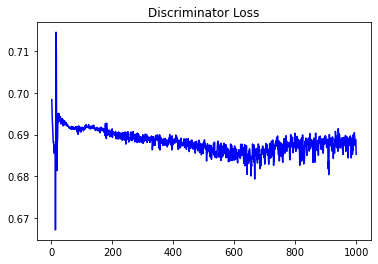

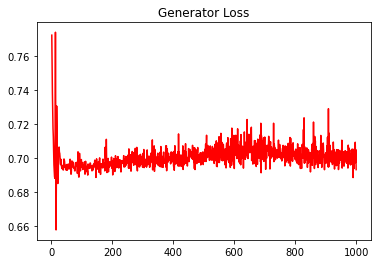

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2887360992111325


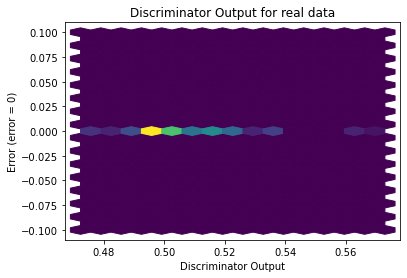

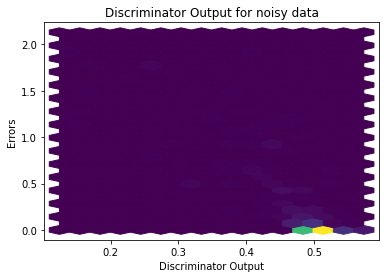

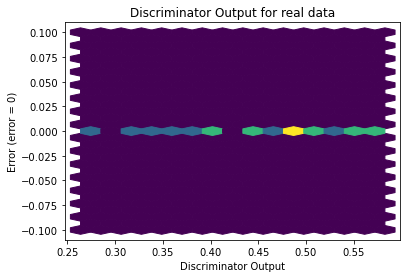

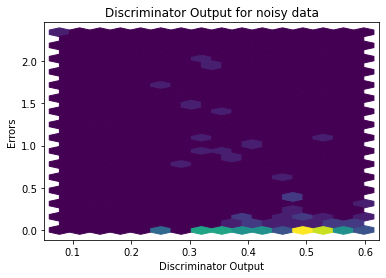

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


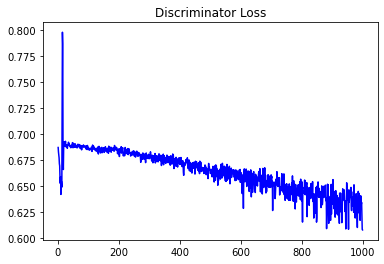

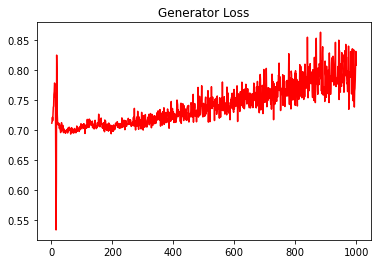

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.23017093874091843


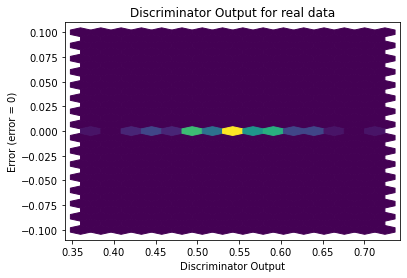

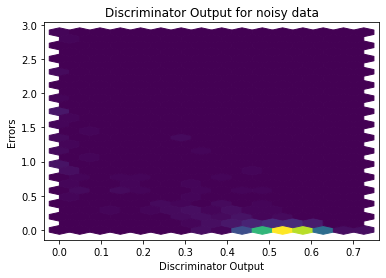

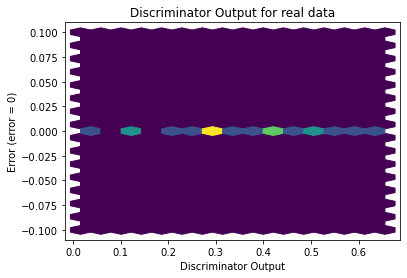

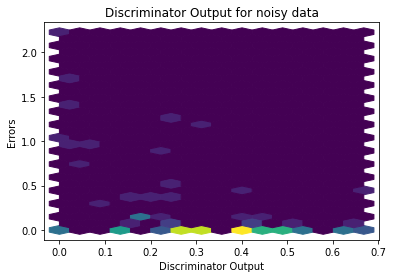

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1271]], requires_grad=True)
